In [29]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils.np_utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [3]:
data = pd.read_csv(r"dataset.csv").astype('float32')

print(data.head(10))

     0      1      2      3      4      5      6      7      8      9  ...  \
0  0.0    0.0    0.0    0.0    0.0    0.0    0.0  168.0  255.0  255.0  ...   
1  0.0    0.0  209.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  ...   
2  0.0  122.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  ...   
3  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   65.0  255.0  ...   
4  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  110.0  137.0  ...   
5  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
6  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
7  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
8  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
9  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   

   775  776  777  778  779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  

In [17]:
X = data.drop('0',axis = 1)
y = data['784']

In [18]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (109560, 28, 28)
Test data shape:  (27390, 28, 28)


In [19]:
print(train_x)

[[[255. 255. 255. ... 255. 255. 255.]
  [255. 255. 255. ... 255. 255. 255.]
  [255. 255. 255. ... 255. 255. 255.]
  ...
  [255. 255. 255. ... 255. 255. 255.]
  [255. 255. 255. ... 255. 255. 255.]
  [255. 255. 255. ... 255. 255.  40.]]

 [[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.  11.]]

 [[255. 255. 255. ... 255. 255. 255.]
  [255. 255. 255. ... 255. 255. 255.]
  [255. 255. 255. ... 255. 255. 255.]
  ...
  [255. 255. 255. ... 255. 255. 255.]
  [255. 255. 255. ... 255. 255. 255.]
  [255. 255. 255. ... 255. 255.  71.]]

 ...

 [[194. 178. 178. ...   0.   0.  23.]
  [  5.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.  15.]]

 [[255. 255. 255. ... 255. 255. 255.]
  [255. 255.

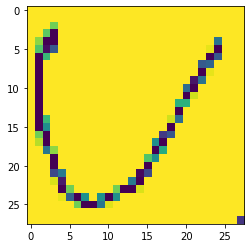

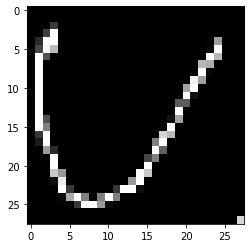

In [20]:
import matplotlib.pyplot as plt

plt.imshow(train_x[0])
plt.show()
plt.imshow(train_x[0], cmap = plt.cm.binary)

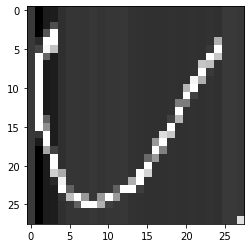

In [21]:
train_x = tf.keras.utils.normalize(train_x, axis = 1)
test_x = tf.keras.utils.normalize(test_x, axis = 1)
plt.imshow(train_x[0], cmap = plt.cm.binary)

In [22]:
print(train_y)

56194      40.0
6031       11.0
75836      71.0
104375    103.0
86662      84.0
          ...  
30039      18.0
94565      93.0
19671      15.0
37180      24.0
97589      96.0
Name: 784, Length: 109560, dtype: float32


In [26]:
print(train_y[36827])

24.0


In [27]:
##Image resizing

In [28]:
IMG_SIZE = 28
trainr_x = np.array(train_x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testr_x = np.array(test_x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training samples dimensions: ", trainr_x.shape)
print("Testing samples dimensions: ", testr_x.shape)


Training samples dimensions:  (109560, 28, 28, 1)
Testing samples dimensions:  (27390, 28, 28, 1)


## Creating neural net

In [33]:
model = Sequential()

#First COnvolutional Layer (109560, 28, 28, 1), 28-3+1=26x26
model.add(Conv2D(64,(3,3), input_shape = trainr_x.shape[1:],  activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

#Second COnvolutional Layer 26-3+1 = 24x24
model.add(Conv2D(64,(3,3),  activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))


#Third COnvolutional Layer 24-3+1 = 22x22
model.add(Conv2D(64,(3,3), activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))


#Fully connected layer 1
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))

#Fully connected layer 2
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))

#Last Fully connected layer
model.add(Flatten())
model.add(Dense(135))
model.add(Activation("relu"))

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

In [35]:
print("Total training samples: ", len(trainr_x))

Total training samples:  109560


In [36]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [68]:
model.fit(trainr_x, train_y, epochs = 20, validation_split = 0.14285)

Epoch 1/20
2935/2935 [==============================] - 98s 33ms/step - loss: 4.9053 - accuracy: 0.0043 - val_loss: 4.9053 - val_accuracy: 0.0049
Epoch 2/20
2935/2935 [==============================] - 93s 32ms/step - loss: 4.9053 - accuracy: 0.0043 - val_loss: 4.9053 - val_accuracy: 0.0049
Epoch 3/20
2935/2935 [==============================] - 80s 27ms/step - loss: 4.9053 - accuracy: 0.0043 - val_loss: 4.9053 - val_accuracy: 0.0049
Epoch 4/20
2935/2935 [==============================] - 93s 32ms/step - loss: 4.9053 - accuracy: 0.0043 - val_loss: 4.9053 - val_accuracy: 0.0049
Epoch 5/20
2935/2935 [==============================] - 77s 26ms/step - loss: 4.9053 - accuracy: 0.0043 - val_loss: 4.9053 - val_accuracy: 0.0049
Epoch 6/20
2935/2935 [==============================] - 78s 27ms/step - loss: 4.9053 - accuracy: 0.0043 - val_loss: 4.9053 - val_accuracy: 0.0049
Epoch 7/20
2935/2935 [==============================] - 77s 26ms/step - loss: 4.9053 - accuracy: 0.0043 - val_loss: 4.9053 -

In [69]:
##Evaluating on testing data 
test_loss, test_acc = model.evaluate(testr_x, test_y)
print("Test loss: ", test_loss)
print("Validation accuracy: ", test_acc)

856/856 [==============================] - 6s 7ms/step - loss: 4.9053 - accuracy: 0.0040
Test loss:  4.905313491821289
Validation accuracy:  0.00401606410741806


In [70]:
##predictions
predictions = model.predict([testr_x])


In [71]:
print(predictions)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [72]:
print(np.argmax(predictions[0]))

0


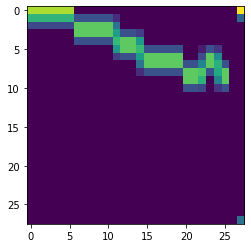

In [73]:
plt.imshow(test_x[0])

In [74]:
print(np.argmax(predictions[128]))

0


In [75]:
img = cv2.imread('2.png')

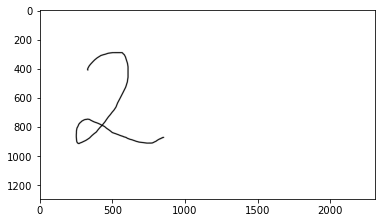

In [76]:
plt.imshow(img)

In [77]:
img.shape

(1296, 2304, 3)

In [78]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [79]:
gray.shape

(1296, 2304)

In [80]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [81]:
resized.shape

(28, 28)

In [82]:
newimg = tf.keras.utils.normalize(resized, axis =1)

In [83]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [84]:
newimg.shape

(1, 28, 28, 1)

In [85]:
predictions = model.predict(newimg)

In [86]:
print(np.argmax(predictions))

0
